# II Cost function

<code>**How to automatically choose parameters θ**</code> so that given a training set we can automatically fit the parameters to our data. <br>
Lets define the optimization objective <code>**cost function that we will use to fit the parameters.**</code><br>

Supervised learning problem of fitting logistic regression model :

<code>**We have our trainig set of m training examples that looks like:**</code><br>

\begin{multline*}
{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)}) }
\end{multline*}

<code>**Our m examples are represented by a feature vector thats n+1 dimension. x_0 is equal to 1 and because this is clasification problem our training set has the property that every label y is either 0 or 1:**</code><br>

\begin{multline*}
x \in 
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
... \\
x_n
\end{bmatrix}
\in\mathbb{R^{n+1}},
x_0 = 1, y\in {0,1}
\end{multline*}



<code>**Hypothesis:**</code><br>

\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

<code>**How to choose/fit parameters θ?**</code><br>

When we were developing the [linear regression model](../__linear_regression/__I_Linear_regression.ipynb) model we used the following cost function (a little bit different but in general it is the same principle)

<code>**Cost function (linear regression):**</code><br>

\begin{multline*}
J(\theta) = \dfrac{1}{m}\sum_{i=1}^{m}\dfrac{1}{2}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

The cost function is a sum over our training set which is 1/m times the sum of our training set of this cost term here.

<code>**Simplified cost function for one sample:**</code><br>

\begin{multline*}
\text{cost} (h_{\theta}(x), y) = \dfrac{1}{2}(h_{\theta}(x) -y)^2
\end{multline*}

Interpretation of this cost function is that it is the cost that we want our learning algoritmh to pay if it outputs prediction value h𝜃(𝑥) with respect to the actual label y. As for the liner regression the cost of this is 1/2 times the square difference between what we predicted and the actual value that we observe for the y. And this cost function worked fine for <code>**linear regression**</code> but we are interested in <code>**logistic regression**</code>. If we could minimze this cost function that it is plugged into J that would work. But this would be a non-convex function of the parameters data.

This happens because for logistic regression function h𝜃(𝑥) has a nonlinearity.

\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

This is pretty complicated nonlinear (sigmoid) function. And if taken and pluged in here:

\begin{multline*}
\text{cost} (h_{\theta}(x), y) = \dfrac{1}{2}(h_{\theta}(x) -y)^2
\end{multline*}

And then here:

\begin{multline*}
J(\theta) = \dfrac{1}{m}\sum_{i=1}^{m}\dfrac{1}{2}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

And then if we plot what J(𝜃) look like this with many local optima.<code>**If GD algorithm would run on this sort of function it most likely will not converge to the global minimum:**</code>:

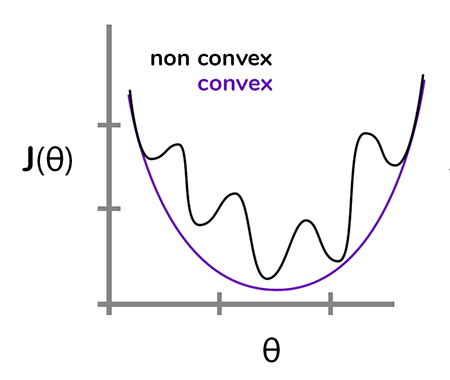

--------------------------------------------------------------------------------------

##  Convexity

The problem using this cost function is that because of this very non linear function that apperars in the midle of all process. So J(𝜃) appears being a nonconvex function if you were to define it as a square cost function. So we have to used something different that would to be a convex and we could apply gradient descent.

<code>**NOTE!:**</code><br>
<code>**The topic of [convexity analysis](https://en.wikipedia.org/wiki/Convex_analysis) is beyond this lecture but its quite interesting subdomain of optimization theory worth spending time to get more familiar with it.**</code>

--------------------------------------------------------------
## Logistic regression cost function

We are going to say that the cost or (penalty) that logistic regression algorithm is penalize with If it upwards the value of ℎ𝜃(𝑥) (if this is some number like 0.725) it predicts the value of ℎ𝜃(𝑥) and the actuall cost label turn out to be y (0,1) the costs is going to be:  

<code>**Hypothesis, our log of odds**</code><br>
\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

<code>**Cost function (logistic regression):**</code><br>

\begin{multline*}
\text{cost} (h_{\theta}(x), y) = \left\{ \begin{array}{rcl}
-\log(h_{\theta}(x)) \ \text{if} \ y = 1\\
-\log(1- h_{\theta}(x)) \ \text{if} \ y = 0
\end{array}\right.
\end{multline*}

Lets plot this function to gain some intuition abouth what its doing.

<code>**if y = 1:**</code>
\begin{multline*}
-\log(h_{\theta}(x))
\end{multline*}

<code>**We know that:**</code>
\begin{multline*}
0 \leq h_{\theta}(x) \leq 1
\end{multline*}


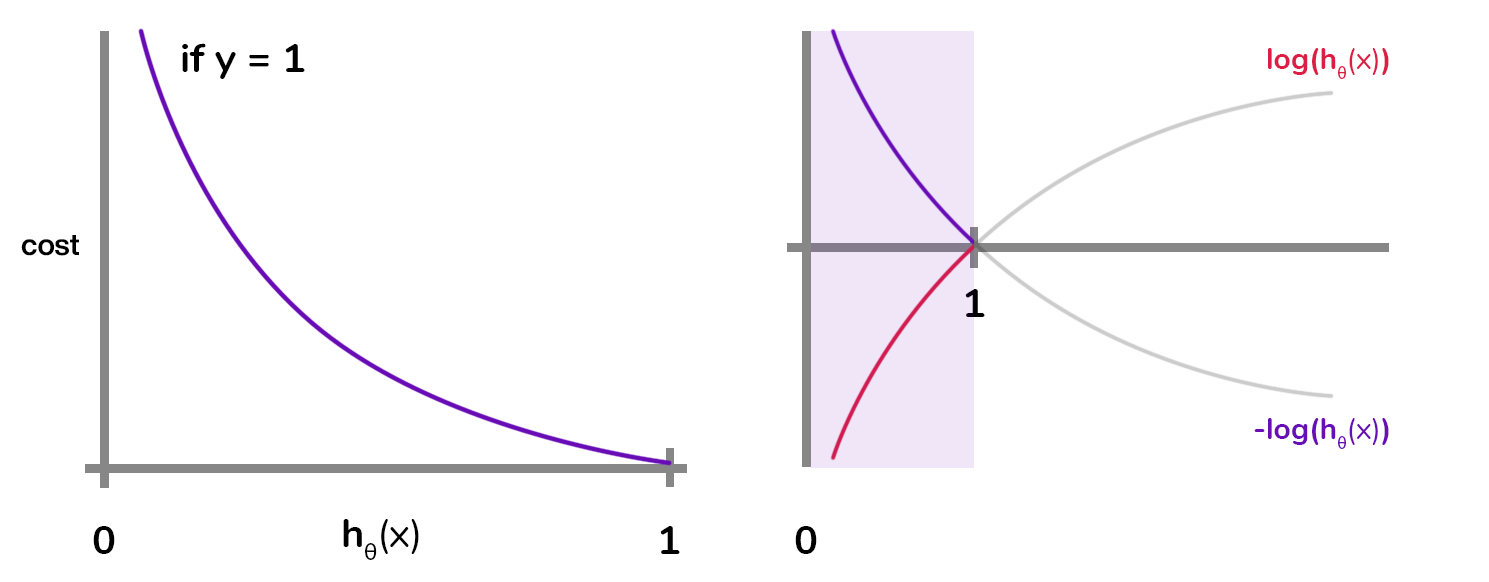

One way to see why the plot look like this is because if we were to plot log(ℎ𝜃(𝑥)) we would get as view above on right,  approaching -∞. And -log(ℎ𝜃(𝑥)) will look as red plot and <code>**we are interest in the range when this function goes between 0 and 1**</code>.<br>

<div class="alert alert-block alert-success">

<h2>Logistic regression cost function: Interesting and desirable properties</h2>

<code>**-log(ℎ𝜃(𝑥)) | −log(1−ℎ𝜃(𝑥))**</code><br>
    
Notice that if <code>**y = 1 and ℎ𝜃(𝑥) = 1**</code> , in other words if hypothesis exactly predicst 1 and y is exactly equal to what it predicted, <code>**then cost = 0**</code>. But notice also that as <code>**ℎ𝜃(𝑥) → 0, cost → ∞**</code>. The coast blows out and it goes to infinity. <br>
This captures the intuition that if: <code>**ℎ𝜃(𝑥) = 0 , predicts P(y = 1 | x; 𝜃) = 0, but y = 1**</code> the learning algorithm will be penalized by a very large cost.<br>
</div>

<code>**if y = 0:**</code>
\begin{multline*}
-\log(1 - h_{\theta}(x))
\end{multline*}

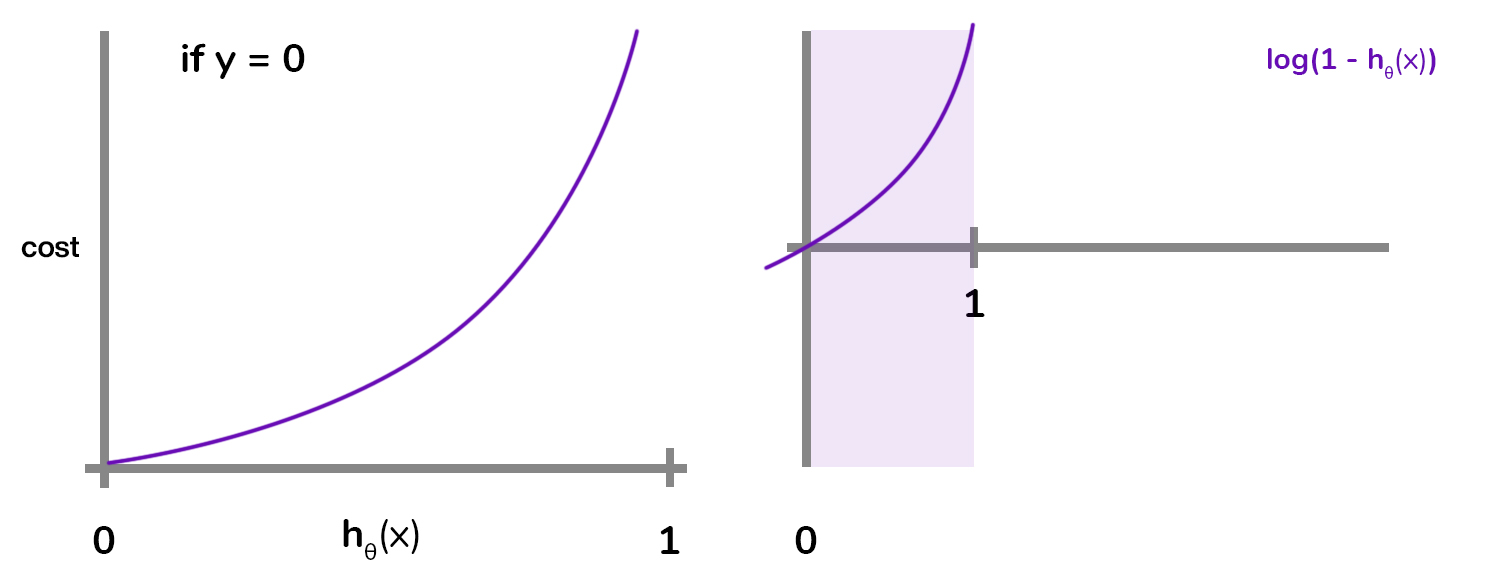

Now it blows up and goes to <code>**+∞ as ℎ𝜃(𝑥) goes to 1, because as before y = 0 , but ℎ𝜃(𝑥) = 1**</code>,then we end up paying a very large cost. If  ℎ𝜃(𝑥) = 0 and y = 0 then cost of this hypothesis  is going to be 0.

<div class="alert alert-block alert-success">

<h2>Practice exercise I</h2>

Which of the following statements are true?
 * <code>**if ℎ𝜃(𝑥) = y, then cost(ℎ𝜃(𝑥),y) = 0 (for y=0 and y=1)**</code>
 * <code>**if y = 0, then cost(ℎ𝜃(𝑥),y) → ∞  as ℎ𝜃(𝑥) → 1**</code>
 * <code>**if y = 0, then cost(ℎ𝜃(𝑥),y) → ∞  as ℎ𝜃(𝑥) → 0**</code>
 * <code>**Regardless of whether y = 0 or y = 1, ℎ𝜃(𝑥) = 0.5, then cost(ℎ𝜃(𝑥),y) > 0**</code>
</div>

------------------------------------------------------------------------

## Simplified Cost Function 

Previously we defined a cost function <code>**for a single training example**</code>. We can develop this further and define it for entire training set. There is simpler way to write it then used above and based on that we will apply gradient descent to fit the parameters of logistic regression.

<code>**Logistic regression cost function:**</code>

\begin{multline*}
J(\theta) = \dfrac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)} ),y^{(i)})
\end{multline*}

<code>**cost function for a single example that we worked out earlier:**</code>

\begin{multline*}
\text{Cost} (h_{\theta}(x), y) = \left\{ \begin{array}{rcl}
-\log(h_{\theta}(x)) \ \text{if} \ y = 1\\
-\log(1- h_{\theta}(x)) \ \text{if} \ y = 0
\end{array}\right.
\end{multline*}

<code>**NOTE!: y = 0 or 1, always!**</code>

And because in our classification problem y is always equal to 0 or 1 we will be able to use a <code>**simpler cost function**</code>. Rather than writting out this cost function as above on array of two seperate lines with both seperate cases. We can compress this into one more convenient equation and then derive gradient descent.

<div class="alert alert-block alert-info">
    
<code>**Simpler cost function:**</code><br>
This epxression is equivalent and more compact way of the same as earlier used definition of cost function.
    
\begin{multline*}
\text{Cost} (h_{\theta}(x), y) = -y\log(h_{\theta}(x)) - (1 -y)\log(1 - h_{\theta}(x))
\end{multline*}
</div>


We know that ther are only two possible cases, y = 0 or 1. <br>

<code>**Suppose y = 1, then we get:**</code>
\begin{multline*}
\text{Cost} (h_{\theta}(x), y) = -log(h_{\theta}(x)) 
\end{multline*}

<code>**Suppose y = 0, then we get:**</code>

\begin{multline*}
\text{Cost} (h_{\theta}(x), y) = -\log(1- h_{\theta}(x))
\end{multline*}

## Cross entropy

<code>**Therefore we can write our cost function of logistic regression as fallows:**</code>

<code>**Cost function:**</code>
\begin{multline*}
J(\theta) = \dfrac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)} ),y^{(i)}) = -\dfrac{1}{m}[ \sum_{i=1}^{m} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 -y^{(i)})\log(1 - h_{\theta}(x^{(i)}))]
\end{multline*}

<div class="alert alert-block alert-danger">

<code>**Cost function (vectorized form):**</code>

\begin{multline*}
h =g(X\theta)
\end{multline*}
\begin{multline*}
J(\theta) = \dfrac{1}{m} \cdot(-y^{\top}log(h) - (1 - y)^{\top} log(1-h))
\end{multline*}
</div>

<code>**Maximum likelihood estimation:**</code>

This cost function can be derived from statistics using the principle of [Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)
This idea in statistics for how to efficiently find parameters 𝜃 for different models and it also has a nice properry that it is <code>**convex**</code>. And esentially everyone uses it when fitting logistic regression models. And dont worry about it if you don't know what is Maximum likelihood estimation. Its just a deeper rationale and justicication behind this particular cost function.<br>

<code>**MLE(Maximum likelihood estimation)**</code> sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.MLE assumes a <code>**[joint probability mass function](https://www.youtube.com/watch?v=LJYGete9kQY)**</code>, while <code>**OLS(Ordinary Least Squares)**</code> doesn't require any stochastic assumptions for minimizing distance.


Now we need to find parameters 𝜃 that minimizes J(𝜃).So if we try to minimize this it would give us some set of 𝜃 parameters.<br>
<code>**To fit parameters 𝜃:**</code>
\begin{multline*}
\min_{\theta} J(\theta)
\end{multline*}

Finally if we are given a new example with some set of features 𝑥 we can then take the 𝜃's that we fit to our training set and <code>**output our predictions(hypothesis)**</code>.

<code>**To make a prediction given new 𝑥:**</code>
\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

<code>**Output is the probability:**</code><br>
Our hypothesis is estimating the probability that <code>**𝑦 is 1 given 𝑥 parametrized by 𝜃**</code>
\begin{multline*}
P(y= 1 \vert x ; \theta) 
\end{multline*}



All the remains to be do is figure out how to actually minimize J(𝜃) as a function of 𝜃 that we can actually fit the parameters to our training set. <br>
\begin{multline*}
\min_{\theta} J(\theta)
\end{multline*}

## Gradien descent

<code>**Cost function:**</code>
\begin{multline*}
J(\theta) = -\dfrac{1}{m}[ \sum_{i=1}^{m} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 -y^{(i)})\log(1 - h_{\theta}(x^{(i)}))]
\end{multline*}

<code>**We want:**</code>
\begin{multline*}
\min_{\theta} J(\theta)
\end{multline*}

<code>**Usual template for Gradient descent:**</code><br>
`repeat until convergence (simultaneously update all 𝜃j){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta)
\end{multline*}
`}`

Here is our usual template for gradient descent where we must repeatedly update each parameter by updating it as itself minus learning rate alpha times derivative term.

<code>**Derivative calculus gets us with this equation:**</code>

\begin{multline*}
\dfrac{\partial}{\partial\theta_{j}} J(\theta) =  \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}

If we take this partial derivative term and plug it back<br>
<code>**Gradient descent:**</code><br>
`repeat until convergence (simultaneously update all 𝜃j){
`\begin{multline*}
\theta_{j}: = \theta_{j} - \dfrac{\alpha}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}
`}`

This equation was exactly what we had for linear regression. So natural question are linear regression and logistic regression different algorithms or not ?<br>
This is resolved by observing that for logistic regression, what has changes is that the <code>**definition for the hypothesis ℎ𝜃(𝑥) has changed.**</code>. Whereas for linear regression we had <code>**ℎ𝜃(𝑥) = 𝜃⊤𝑥**</code>, now the definition of ℎ𝜃(𝑥)is:

\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

So even though the update rule looks on surface identical because the definition of the hypothesis has changed this is actually not the same thing as gradient descent for linear regression.
_____________________________________________
Earlier we briefly talk how to monitor gradient descent to make sure that it is converging. Ussualy same method is applied to logistic regression to monitor GD and make sure its converging correctly.
When implementing logisticc regression with gradien descent we have all of these different parameters values 𝜃0, 𝜃1, 𝜃2 down to 𝜃n that we need to update using this GD expression.

\begin{multline*}
\Theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
. \\
. \\
. \\
\theta_{n}
\end{bmatrix}
\end{multline*}

<div class="alert alert-block alert-success">

<h2>Practice exercise II</h2>

Suppose you are running gradient descent to fit a logistic regression model with parameter θ ∈ R(n+1). Which of the following is a reasonable way to make sure the learning rate α is set properly and that gradient descent is running correctly?:
    
 * Plot 𝐽(𝜃) as a function of the number of iterations (i.e. the horizontal axis is the iteration number) and make sure 𝐽(𝜃) is decreasing on every iteration.
    \begin{multline*}
    J(\theta) = \sum_{i=1}^{m}(h_{\theta}(x^{(i)})) -y^{(i)})^2 
    \end{multline*} 
 * Plot 𝐽(𝜃) as a function of the number of iterations and make sure 𝐽(𝜃) is decreasing on every iteration.
    \begin{multline*}
    J(\theta) = -\dfrac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 -y^{(i)})\log(1 - h_{\theta}(x^{(i)}))]
    \end{multline*} 
    
    
 * Plot 𝐽(𝜃) as a function of 𝜃 and make sure it is decreasing on every iteration.
 * Plot 𝐽(𝜃) as a function of 𝜃 and make sure it is convex.                                          
</div>

## Implementation
_______________________________________________________________
And we could have a <code>**for loop, for (i=0 → n)**</code> but ideally we could also use a <code>**vectorized implementation**</code> which can update all of these n+1 parameters
 
\begin{multline*}
\theta: = \theta - \alpha\dfrac{1}{m}\sum_{i=1}^{m}[(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}]
\end{multline*}


<div class="alert alert-block alert-danger">
    
<code>**Vectorized notation:**</code>
\begin{multline*}
\theta: = \theta - \dfrac{\alpha}{m}X^{\top}(g(X\theta) - \overrightarrow{y})
\end{multline*}
</div>

And <code>**feature scaling**</code> to make GD run faster is also applied in logistic regression

## 2 class classification example

In [54]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use('bmh') # bmh comes from Bayesian Methods for Hackers book.

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Generate the dataset

# m = 200
# n = 2

X, y = datasets.make_blobs(
    n_samples   = 100,
    n_features  = 2,
    centers     = 2,
    cluster_std = 5,
    random_state= 11
)

In [56]:
m, n = X.shape
print(f'samples: {m}, features: {n}')
print(f'X shape: {X.shape}, y shape: {y.shape}')

samples: 100, features: 2
X shape: (100, 2), y shape: (100,)


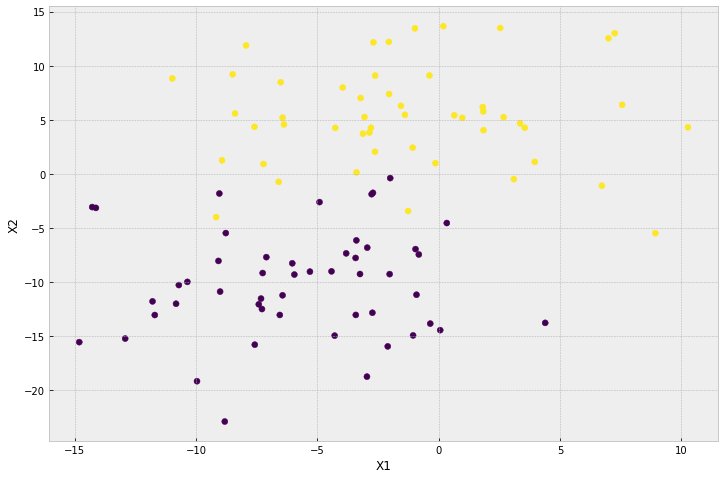

In [57]:
# Visualize the data
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y);
plt.xlabel('X1')
plt.ylabel('X2')
plt.show();

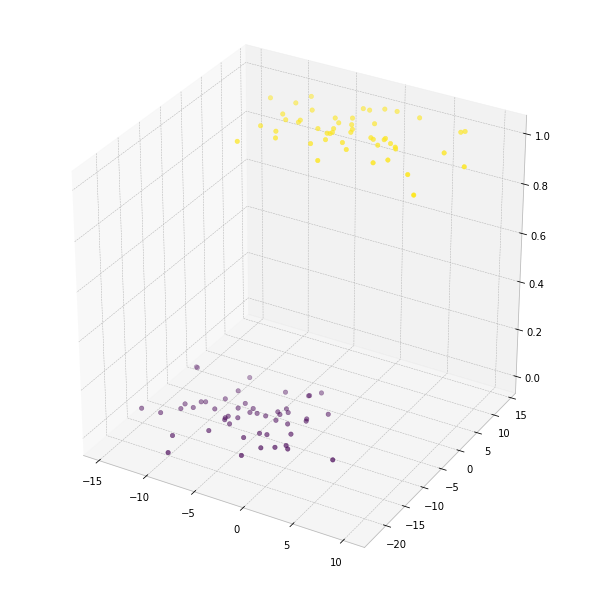

In [58]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.set_facecolor('#ffff')
ax.scatter(X[:,0], X[:,1], y, c=y)
plt.show()

\begin{multline*}
g(z) = \dfrac{1}{1+e^{-z}}
\end{multline*}

In [59]:
# Logistic model, logit function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

\begin{multline*}
z = \theta^{\top}x
\end{multline*}

In [60]:
def hypothesis(X,θ):
    z = np.dot(X, θ)
    return sigmoid(z)

In [61]:
x0 = np.ones(m).reshape(-1, 1)
X  = np.append(x0, X, axis=1)

In [62]:
print(f'X0 = {X[0]}, y0 = {y[0]}')

X0 = [ 1.         -6.59622964 -0.73115969], y0 = 1


In [63]:
m, n = X.shape

In [64]:
θ = np.zeros(n).reshape(-1,1)
y = y.reshape(-1,1)

In [65]:
print(θ.shape)
print(X.shape)
print(y.shape)

(3, 1)
(100, 3)
(100, 1)


\begin{multline*}
J(\theta) = -\dfrac{1}{m}[ \sum_{i=1}^{m} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 -y^{(i)})\log(1 - h_{\theta}(x^{(i)}))]
\end{multline*}

In [2]:
def _cost(θ, X, y):
    return np.sum(
        y*np.log(hypothesis(X,θ)) + (1 - y) * np.log(1 - hypothesis(X,θ))) / -m

print(f'With current θ`s:\n{θ} \n \n cost is: {_cost(θ, X, y)}')

NameError: name 'θ' is not defined

In [3]:
# _cost_vectorized signature _cost_vectorized(hypothesis, y_vector)
def _cost_vectorized(h, y):
    m = len(y)
    return (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))

print(f'With current θ`s:\n{θ} \n \n cost is: {_cost(θ, X, y)}')

NameError: name 'θ' is not defined

In [67]:
X.shape

(100, 3)

In [68]:
len(X)

100

In [69]:
n

3

In [70]:
# train test subsets split
n = int(len(X) * 0.8)
A = np.concatenate((X, y), axis=1)
np.random.shuffle(A)

X_train = A[:n,  :3]
X_test  = A[n:,  :3]
y_train = A[:n, 3:]
y_test  = A[n:, 3:]

<code>**Gradient descent:**</code><br>
`repeat until convergence (simultaneously update all 𝜃j){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta)
\end{multline*}
`}`

\begin{multline*}
\theta: = \theta - \dfrac{\alpha}{m}\sum_{i=1}^{m}[(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}]
\end{multline*}

<code>**Vectorized notation:**</code>
\begin{multline*}
\theta: = \theta - \dfrac{\alpha}{m}X^{\top}(g(X\theta) - \overrightarrow{y})
\end{multline*}

In [71]:
m, n = X_train.shape

In [72]:
cost = []

In [73]:
def GD(X, y, θ, m, α, iters):
    for i in range(iters):
        error    = hypothesis(X, θ) - y
        gradient = np.dot(X.T, error)
        θ -= α/m * gradient
        cost.append(_cost(θ, X, y))
    return θ

In [74]:
θ = GD(X_train, y_train, θ, m,  0.1, 1000)
print(f'With current θ`s:\n{θ} \n \n cost is: {_cost(θ, X, y)}')

With current θ`s:
[[1.99156239]
 [0.19380303]
 [0.65221049]] 
 
 cost is: 0.13624759701254152


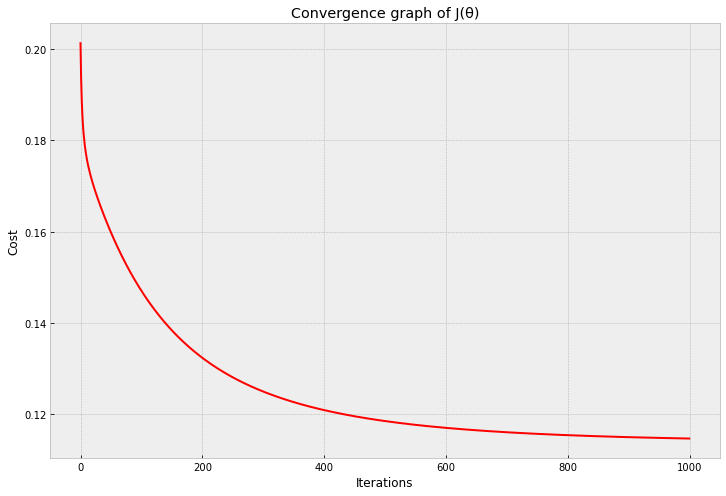

In [76]:
def plot(data):
    plt.figure(figsize=(12,8))
    #plt.plot(x, y)
    plt.plot(range(len(data)), data,'r')
    plt.title("Convergence graph of J(θ)")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()
        
plot(cost)

In [ ]:
def fit(X, y):
    θ    = []
    cost = []
    

\begin{multline*}
\text{P}(y = 1 |x; \theta)
\end{multline*}

In [81]:
y_pred = hypothesis(X_test, θ)
y_pred

array([[5.82531330e-01],
       [2.84527756e-02],
       [1.64604020e-05],
       [1.13713944e-03],
       [9.92112782e-01],
       [5.58807333e-01],
       [6.50091824e-02],
       [9.98310901e-01],
       [4.20071722e-04],
       [9.99929241e-01],
       [9.76900921e-01],
       [6.05497026e-04],
       [2.94861258e-05],
       [9.07536964e-01],
       [1.87268457e-04],
       [9.66754012e-01],
       [1.40521329e-03],
       [9.99917877e-01],
       [4.39354265e-07],
       [9.98403889e-01]])

In [83]:
def predict(X, θ, p_thr = 0.5):
    y_pred = hypothesis(X, θ)
    return [1 if i > p_thr else 0 for i in y_pred]
    #return np.fromiter([1 if i > p_thr else 0 for i in y_pred], int).reshape(-1,1)

In [85]:
y_pred = predict(X_test,θ)
y_pred

[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 0  9]]
